ANA 540 Assignment 3 Week 2 Regression Models

# Set up to start coding

As before, this Jupyter Notebook is coded to run locally on your computer rather than on Colab or Kaggle.

Start with all the normal things that belong at the beginning of a program

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline:

In [41]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np
import urllib.request
import pandas as pd
import scipy
import seaborn as sns

import plotly.express as px
from plotly import graph_objs as go

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"

# Get the data and start EDA

Get the data and take a look at it.  

To get the data, create a sub-dataframe with variables of interest, and generate summary stats. You can see the variables I've chosen as those of most interest.  You may choose others.    

Remember that the train and test sets have already been setup for you from Kaggle.  You'll need to figure out what the split is from the number of records in each.  There is also other information you should check.  Plus, do not forget to verify the assumptions for doing a regression analysis!  

Don't forget you need the full path to where you saved the data!  

In [42]:
df_train = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\HousingData\train.csv')
df_test = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\HousingData\test.csv')

print("shape of train data: ", df_train.shape)
print("shape of test data: ", df_test.shape)
print()
print()

#Select the variables to use in the regression
df2_train = df_train[['LotArea', "OverallCond", 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", 'TotRmsAbvGrd', "Fireplaces", "GarageArea", "WoodDeckSF", "PoolArea", 'SalePrice']]

print(df_train.info())
print()
print()
print(df2_train.info())
print()
print()
print(df2_train.describe())

shape of train data:  (1460, 81)
shape of test data:  (1459, 80)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null 

In [43]:
df2_train.isnull().sum()

LotArea         0
OverallCond     0
YearBuilt       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
WoodDeckSF      0
PoolArea        0
SalePrice       0
dtype: int64

   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


<AxesSubplot:ylabel='Count'>

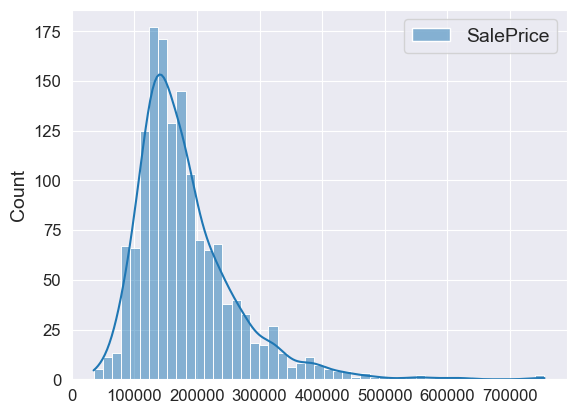

In [44]:
Price_train = df2_train[['SalePrice']]
print(Price_train.head())

#Use Seaborn to generate a histogram

sns.set_style('darkgrid')
sns.histplot(data=Price_train, kde=True)


The histogram looks pretty skewed.  Do you remember which way?  You will need to check the other variables you want to include in your regression analysis!  Do you remember how to correct for this?  

You should also check scatterplots of the data.  

To get the total size of the houses to accurately generate the scatter plots you have to add the 1st and 2nd floor square foot sizes.  Note that to add these columns from two dataframes together using these commands the columns have to have the same column names.  

   1stFlrSF
0       856
1      1262
2       920
3       961
4      1145
   2ndFlrSF
0       854
1         0
2       866
3       756
4      1053
   size
0  1710
1  1262
2  1786
3  1717
4  2198


<AxesSubplot:ylabel='Count'>

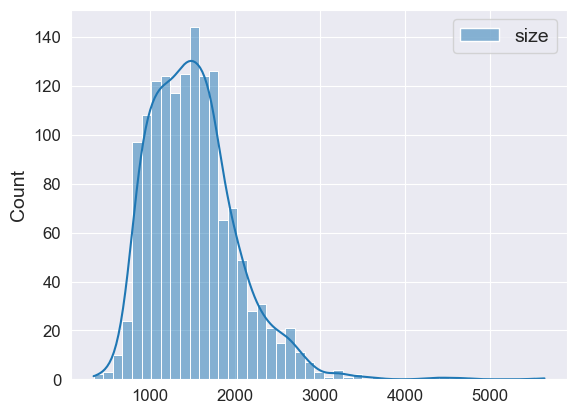

In [45]:
first = df2_train[['1stFlrSF']]
print(first.head())
first.columns = ["size"]
second = df2_train[['2ndFlrSF']]
print(second.head())
second.columns = ["size"]
df_add = first.add(second, fill_value=0)
print(df_add.head())

sns.set_style('darkgrid')
sns
sns.histplot(data=df_add, kde=True)



   GrLivArea
0       1710
1       1262
2       1786
3       1717
4       2198


<AxesSubplot:ylabel='Count'>

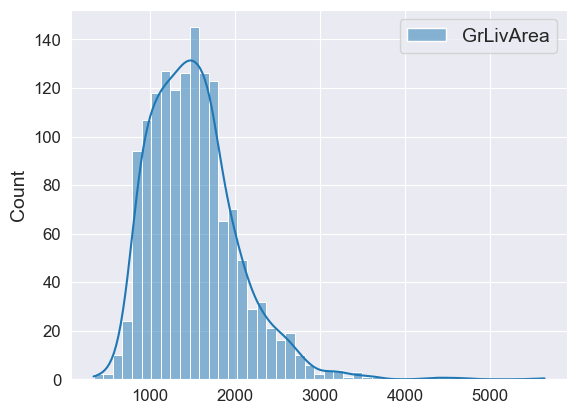

In [46]:
#compare to the total living area listed
area = df_train[["GrLivArea"]]
print()
print(area.head())

sns.set_style('darkgrid')
sns.histplot(data=area, kde=True)


Ok, I believe these are the same.  Sometimes listing agents use different size standards for the total sq feet of a house.  

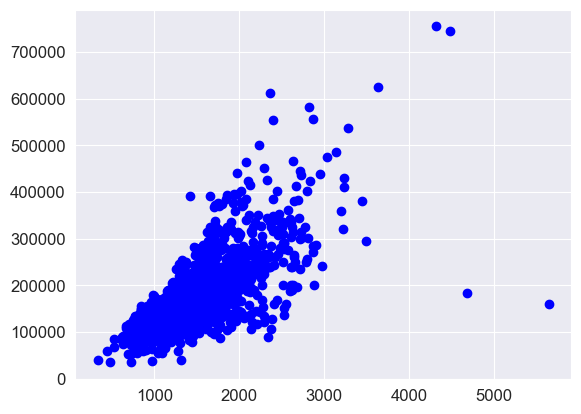

In [47]:
plt.scatter(df_add, Price_train, c="blue")

This has some interesting data points.  The distribution doesn't look particularly skewed.  You will want to check the other variables too!  And you'll probably want to do some boxplots and check some correlations...  Unless you have scaled or normalized it, the price of the houses will dwarf the other boxplots.  You could create a new dataframe with just the other variables.  Or, you can just limit the extent of the y-axis.  

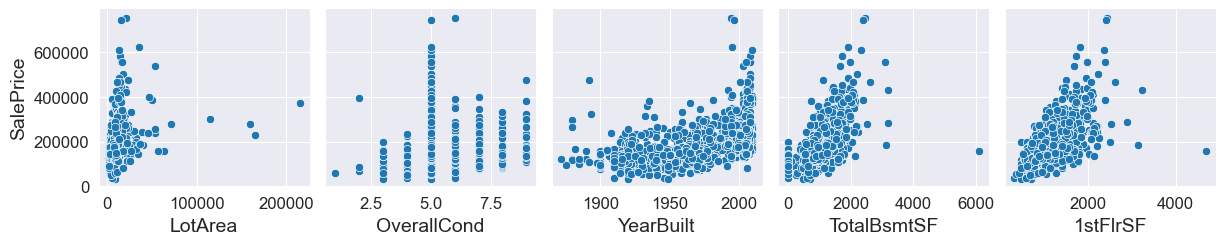

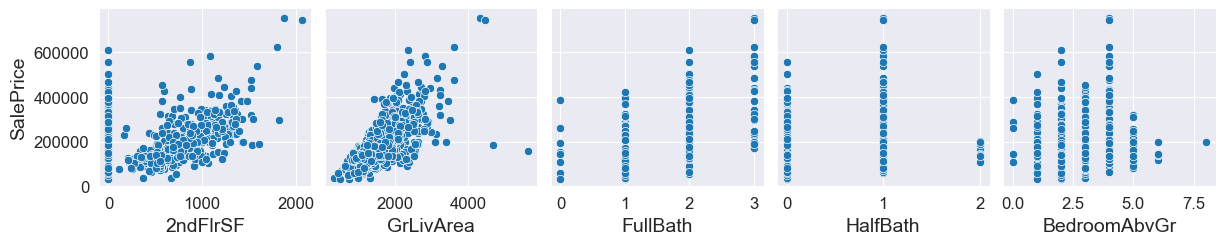

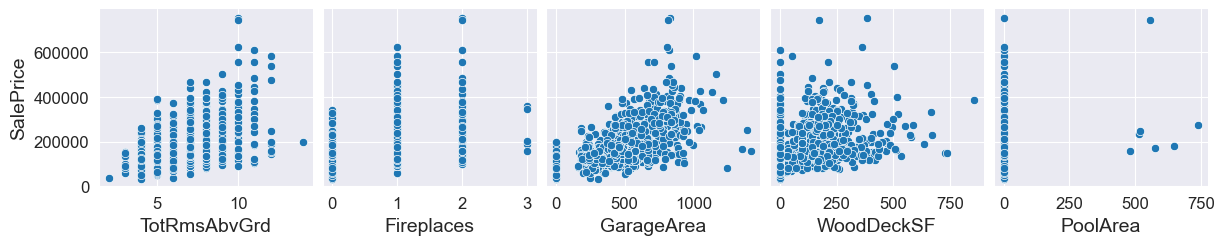

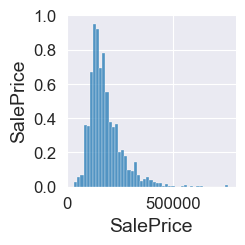

In [48]:
for i in range(0, len(df2_train.columns), 5):
    sns.pairplot(data=df2_train,
                x_vars=df2_train.columns[i:i+5],
                y_vars=['SalePrice'])

It should be pretty obvious which variables are categorical variables!  Plus some of these are not linear!  

(0.0, 600000.0)

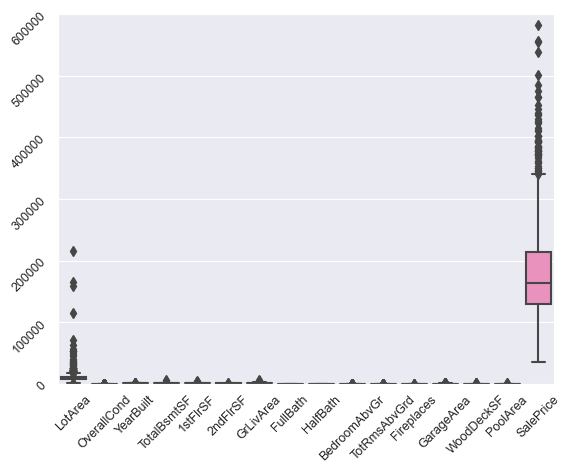

In [49]:
b= sns.boxplot(data=df2_train)
b.tick_params(labelsize=9, rotation=45);
plt.ylim([0, 600000])

(0.0, 20000.0)

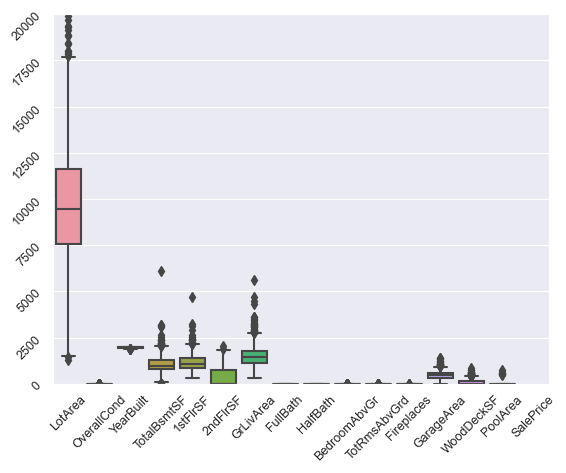

In [50]:
#do you want to scale the SalePrice in order to see the boxplot on the figure with other variables?  
b = sns.boxplot(data=df2_train)
b.tick_params(labelsize=9, rotation=45);
plt.ylim([0,20000])

Here are the correlations, numbers and a heatmap.  

               LotArea  OverallCond  YearBuilt  TotalBsmtSF  1stFlrSF  \
LotArea       1.000000    -0.005636   0.014228     0.260833  0.299475   
OverallCond  -0.005636     1.000000  -0.375983    -0.171098 -0.144203   
YearBuilt     0.014228    -0.375983   1.000000     0.391452  0.281986   
TotalBsmtSF   0.260833    -0.171098   0.391452     1.000000  0.819530   
1stFlrSF      0.299475    -0.144203   0.281986     0.819530  1.000000   
2ndFlrSF      0.050986     0.028942   0.010308    -0.174512 -0.202646   
GrLivArea     0.263116    -0.079686   0.199010     0.454868  0.566024   
FullBath      0.126031    -0.194149   0.468271     0.323722  0.380637   
HalfBath      0.014259    -0.060769   0.242656    -0.048804 -0.119916   
BedroomAbvGr  0.119690     0.012980  -0.070651     0.050450  0.127401   
TotRmsAbvGrd  0.190015    -0.057583   0.095589     0.285573  0.409516   
Fireplaces    0.271364    -0.023820   0.147716     0.339519  0.410531   
GarageArea    0.180403    -0.151521   0.478954     

LotArea         12.207688
OverallCond      0.693067
YearBuilt       -0.613461
TotalBsmtSF      1.524255
1stFlrSF         1.376757
2ndFlrSF         0.813030
GrLivArea        1.366560
FullBath         0.036562
HalfBath         0.675897
BedroomAbvGr     0.211790
TotRmsAbvGrd     0.676341
Fireplaces       0.649565
GarageArea       0.179981
WoodDeckSF       1.541376
PoolArea        14.828374
SalePrice        1.882876
dtype: float64

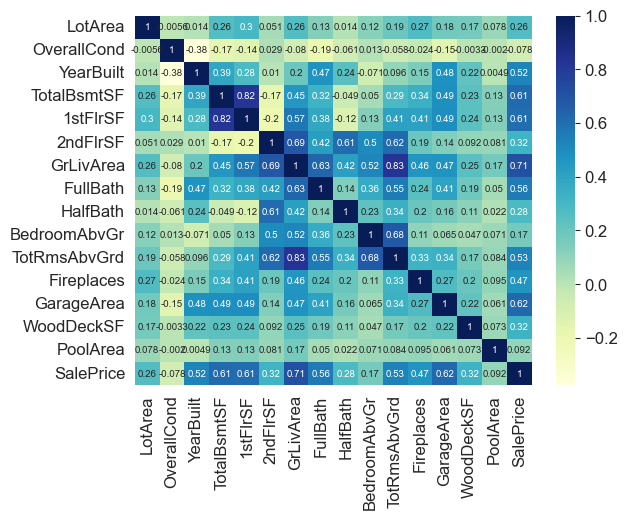

In [51]:
print(df2_train.corr())
dataplot = sns.heatmap(df2_train.corr(), cmap="YlGnBu", annot=True, annot_kws={"size":7})
df2_train.skew()

There are some correlations that we should be concerned about.  But for now we will just forge ahead!  


# Regression Analysis

Do the split for train and test sets.  We also need to setup SalePrice as our target (response).  

In [52]:
y_train = df2_train.SalePrice
x_train = df2_train.iloc[:,:15]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2_train.iloc[:,:15],y_train,test_size=0.2)

print("Training shape = ",x_train.shape)
print("Testing shape = ",x_test.shape)
print()
print()


Training shape =  (1168, 15)
Testing shape =  (292, 15)




Start with LinearRegression from sklearn.linear_model and no scaling etc.  

In [53]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train, y_train)
score = LR.score(x_test, y_test)
score


0.7906530654231236

In [54]:
y_pred=LR.predict(x_test)
y_pred
y_pred_scaled = y_pred * 1000
y_pred_scaled

array([1.47055472e+08, 3.17911199e+08, 1.16343294e+08, 1.94812467e+08,
       2.67389590e+08, 9.09078459e+07, 2.23882901e+08, 1.71527690e+08,
       8.71734956e+07, 1.58414375e+08, 1.36442269e+08, 1.07649065e+08,
       1.36008781e+08, 2.11041500e+08, 2.10715233e+08, 1.33724826e+08,
       2.12907307e+08, 1.46673930e+08, 1.03729153e+08, 2.09939723e+08,
       1.83010688e+08, 1.98423864e+08, 1.89335588e+08, 1.20384589e+08,
       1.98900926e+08, 1.74909212e+08, 1.85926875e+08, 1.00833620e+08,
       2.01952898e+08, 2.05966767e+08, 1.05356149e+08, 2.70596808e+08,
       2.94453487e+08, 1.21410618e+08, 2.57314518e+08, 1.54099754e+08,
       1.54816971e+08, 2.16612827e+08, 2.96983020e+08, 7.19798294e+07,
       1.27793543e+08, 2.46891216e+08, 1.06675834e+08, 3.19299885e+08,
       1.16864502e+08, 9.11074232e+07, 1.11942902e+08, 1.32087215e+08,
       3.20949483e+08, 1.42868274e+08, 1.12719667e+08, 2.33723405e+08,
       1.30550968e+08, 3.28905706e+08, 1.67807876e+08, 2.40746281e+08,
      

In [55]:
LR.score(x_test, y_test)

0.7906530654231236

Ok, so about 75% accuracy.  Not bad for a first attempt!  

In [56]:
y_train = (df2_train.SalePrice / 1000)
x_train = df2_train.iloc[:,:15]

print(y_train.head)
print()
print(x_train.head)
print()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2_train.iloc[:,:15],y_train,test_size=0.2)

print("Training shape = ",x_train.shape)
print("Testing shape = ",x_test.shape)
print()
print()


<bound method NDFrame.head of 0       208.500
1       181.500
2       223.500
3       140.000
4       250.000
         ...   
1455    175.000
1456    210.000
1457    266.500
1458    142.125
1459    147.500
Name: SalePrice, Length: 1460, dtype: float64>

<bound method NDFrame.head of       LotArea  OverallCond  YearBuilt  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0        8450            5       2003          856       856       854   
1        9600            8       1976         1262      1262         0   
2       11250            5       2001          920       920       866   
3        9550            5       1915          756       961       756   
4       14260            5       2000         1145      1145      1053   
...       ...          ...        ...          ...       ...       ...   
1455     7917            5       1999          953       953       694   
1456    13175            6       1978         1542      2073         0   
1457     9042            9       1941         1152

In [57]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train, y_train)
score = LR.score(x_test, y_test)
score

0.7954635312490398

A little better effort this time.  

Set it up again to check against one of the categorical variables, overall condition of the house.  Here we don't have to split out the y-variable, SalePrice, from the x_train data.  

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'SalePrice ~ C(OverallCond)'
model = ols(formula, data=df2_train).fit()
aov_table=sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(OverallCond),1.154581e+12,8.0,26.003173,7.962289e-38
Residual,8.053330e+12,1451.0,NaN,NaN


Ok, I do not want to get too far down into interpreting ANOVA.  But, we do need to do a bit more work for this.

In [59]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov=aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(OverallCond),1.154581e+12,8.0,1.443226e+11,26.003173,7.962289e-38,0.12539,0.120495
Residual,8.053330e+12,1451.0,5.550193e+09,NaN,NaN,NaN,NaN


Do you agree that the overall condition of the house has a statistically significant effect on the sale price?  

We can do more to check that we have satisfied all the required assumptions.  

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:title={'center':'Probability plot of model residuals'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>>

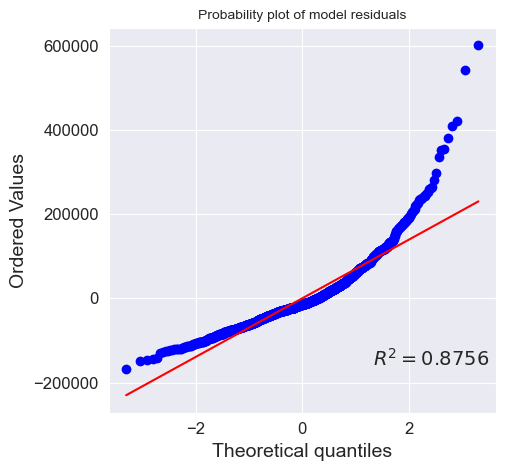

In [60]:
import scipy.stats as stats
stats.shapiro(model.resid)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot = plt, rvalue = True)
ax.set_title("Probability plot of model residuals", fontsize = 10)
ax.set

We already knew that we had some nonlinearities that we have not corrected for.  This again confirms that.  

In [61]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
score = RF.score(x_test, y_test)
score

0.8578803268559922

This is a nice result using Random Forest Regression, over 99%!  

Let's run this again using the LinearRegression function from the sklearn.linear_model package for Python but this time with scaling.  

In [62]:
df_y = df2_train.SalePrice
df_X = df2_train.iloc[:,0:15]
X = df2_train.iloc[:,:15]

df_y.shape
df_X.shape

(1460, 15)

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
y=(df2_train.SalePrice / 1000)

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_transform, y)
lin_reg.intercept_, lin_reg.coef_

(180.92119589041093,
 array([  3.29397309,  10.61560226,  23.58441402,  15.49496678,
          6.37579195,   9.93711621,  24.08237732,   1.56353923,
         -0.98433192, -12.1979821 ,   8.48168423,   7.02575536,
         10.86539898,   3.24926249,  -2.18691223]))

Next we will try gradient descent.  

In [65]:
y = df2_train.SalePrice
X_transform = df2_train.iloc[:,:15]

y.shape
X_transform.shape

(1460, 15)

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
y=(df2_train.SalePrice / 1000)

In [67]:
x = np.c_[np.ones(X_transform.shape[0]), X_transform]
y.shape
x.shape

(1460, 16)

Keep in mind that we are back up to 16 columns because we have inserted the preceding column of 1s.  We still have the response or predictive variable SalePrice out of the set of independent variables.  

In [68]:
alpha = 0.01
iters = 2000
m = y.size 
print(m)
theta = np.random.rand(16)
#predictions = hypothesis(X_transform, theta)

1460


In [69]:
def gradient_descent(x, y, theta, iters, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iters):
        predictions = np.dot(x, theta)
        error = predictions - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs


past_thetas, past_costs = gradient_descent(x, y, theta, iters, alpha)
theta = past_thetas[-1]

print("Gradient Descent {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}".format(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6], theta[7]))
print("Gradient Descent {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}".format(theta[8], theta[9], theta[10], theta[11], theta[12], theta[13], theta[14], theta[15]))

Gradient Descent 180.92, 3.28, 10.57, 23.22, 15.59, 9.75, 13.65, 19.15
Gradient Descent 1.87, -0.75, -12.22, 8.63, 7.03, 10.93, 3.27, -2.14


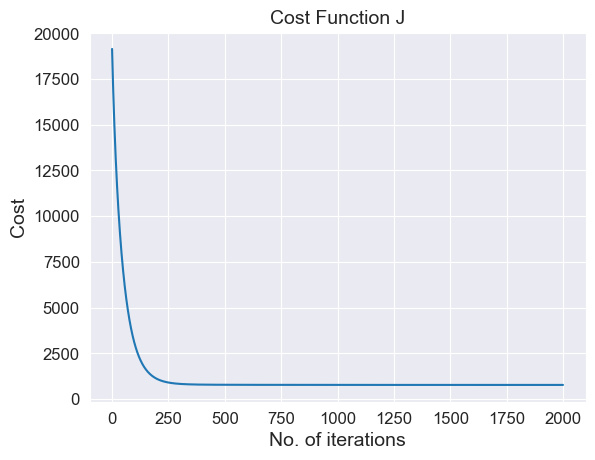

In [70]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [71]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; using Pillow instead.



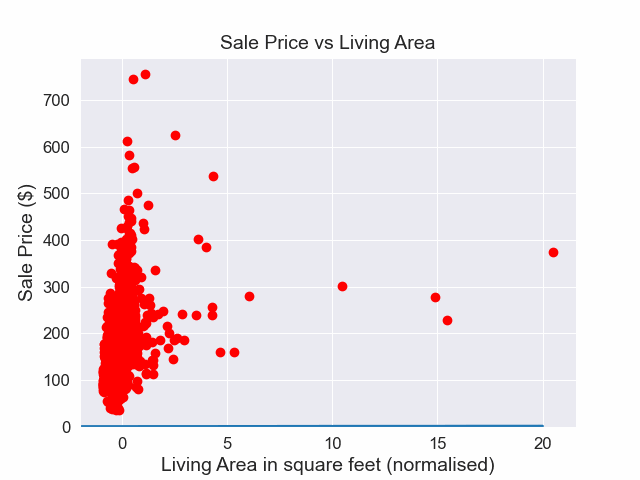

In [72]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

These are the coefficient values returned by gradient descent with a learning rate of 0.01 and 2000 iterations.  It is interesting to compare these to the output from the LinearRegression function in sklearn.learn_model.  

Websites accessed for this assignment: 

Kaggle, House Prices - Advanced Regression Techniques at https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques 

Kaggle at https://www.kaggle.com/code/pablo94/house-prices-simple-model-with-high-r2-score 

Kaggle at https://www.kaggle.com/code/zahidfaiz/linear-regression-from-scratch-gradient-descent 

Python for Data Science at https://www.pythonfordatascience.org/anova-python/  
